In [1]:
#!pip install matplotlib

In [2]:
#matplotlib package ke andar .pyplot file hai
import matplotlib.pyplot as plt # for gaphs
import seaborn as sb # for graphs
import pandas as pd  # data manipulation
import numpy as np   # for mathematics
import warnings      # to ignore any warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew # calling library for scientific python statistical calculation
from sklearn .preprocessing import MinMaxScaler
from sklearn .preprocessing import StandardScaler
# Apply Label Encoder for object type column Gender and Remarks and converts into Numeric type..
# data machine ko dene se pehle data ko process karna hota hai
from sklearn.preprocessing import LabelEncoder
# LabelEncoder is inbuilt class

In [3]:
df=pd.read_csv('IMDB_Movie_Data.csv')
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [4]:
df.shape

(1000, 12)

In [5]:
# to check null values
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

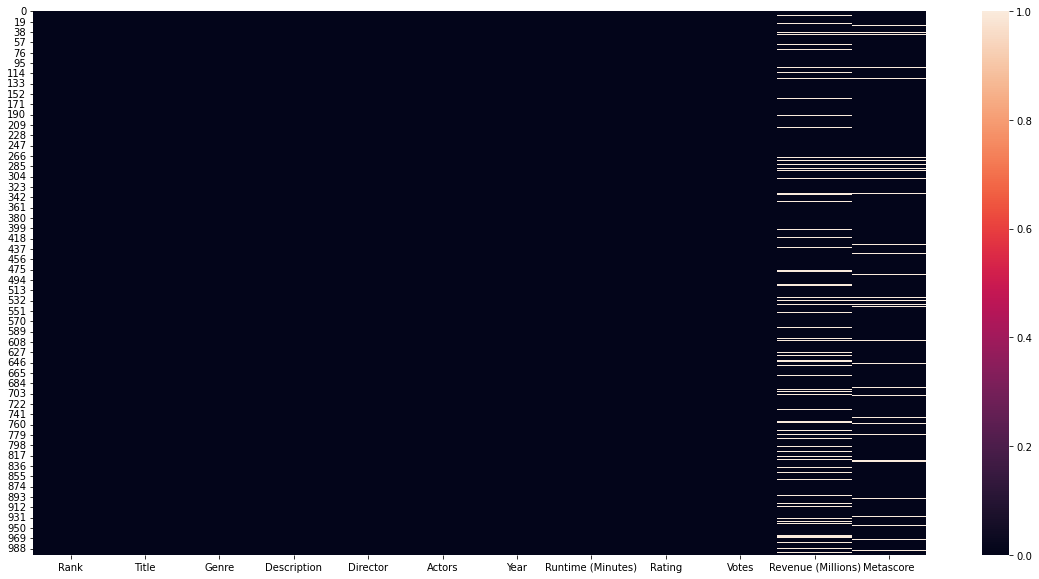

In [6]:
# to check null values in given dataset in visualisation form
plt.figure(figsize=(20,10))
sb.heatmap(df.isnull())
plt.show()

In [7]:
df.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

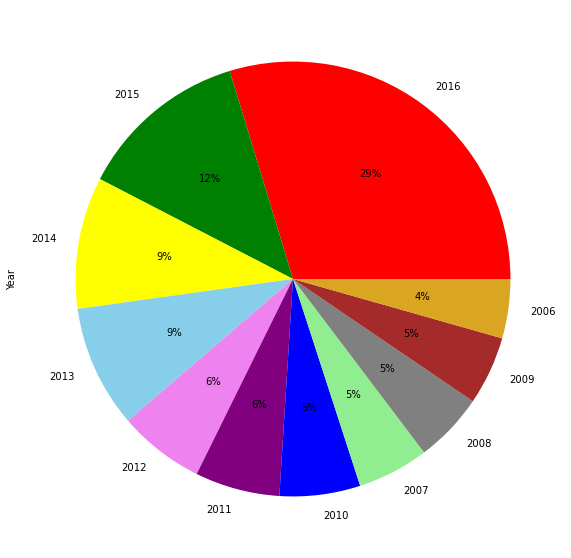

In [8]:
plt.figure(figsize=(10,10))
df['Year'].value_counts().plot(kind='pie',colors=['red','green','yellow','skyblue','violet',
                                                 'purple','blue','lightgreen','grey','brown',
                                                 'goldenrod'],autopct='%d%%')
plt.show()

In [9]:
# to find the percentage of null values in each column in given dataset

df.isnull().sum()/df.shape[0]*100

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [10]:
# so fill null values permanently with MEAN of Revenue (Millions) in Revenue (Millions) columns with fillna()
# so first find the MEAN of Revenue (Millions) column
M=df['Revenue (Millions)'].mean()
df['Revenue (Millions)'].fillna(M,inplace=True)

In [11]:
M=df['Metascore'].mean()
df['Metascore'].fillna(M,inplace=True)

In [12]:
# to check null values in given dataset

df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

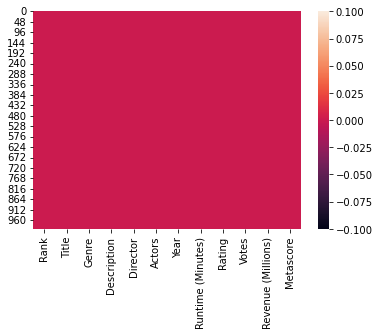

In [13]:
# lets check null values by visualization 
sb.heatmap(df.isnull())

plt.show()

In [14]:
# Now step 2. 
# Check duplicates row
df.duplicated().sum()

0

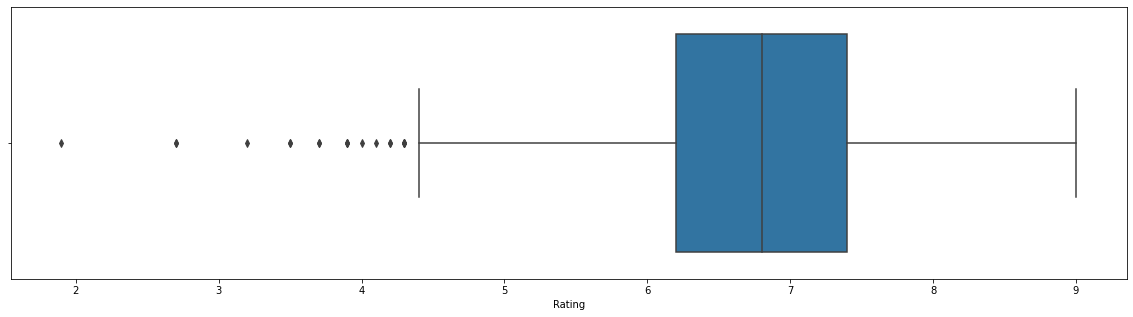

In [15]:
# Check outlier and remove outlier from dataset
# Lower whisker <= Value <= Upper whisker : means no outlier
# so we use boxplot for checking outlier.
plt.figure(figsize=(20,5))
sb.boxplot(data=df,x='Rating')
plt.show()

In [16]:
# to show those records whose rating is less than 5

R = df[df['Rating']<4.5]
#print (R)
R

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,82.956376,58.985043
49,50,The Last Face,Drama,A director (Charlize Theron) of an internation...,Sean Penn,"Charlize Theron, Javier Bardem, Adèle Exarchop...",2016,130,3.7,987,82.956376,16.000000
63,64,Fifty Shades of Grey,"Drama,Romance,Thriller",Literature student Anastasia Steele's life cha...,Sam Taylor-Johnson,"Dakota Johnson, Jamie Dornan, Jennifer Ehle,El...",2015,125,4.1,244474,166.150000,46.000000
237,238,The Disappointments Room,"Drama,Horror,Thriller",A mother and her young son release unimaginabl...,D.J. Caruso,"Kate Beckinsale, Mel Raido, Duncan Joiner, Luc...",2016,85,3.9,4895,2.410000,31.000000
269,270,Satanic,Horror,Four friends on their way to Coachella stop of...,Jeffrey G. Hunt,"Sarah Hyland, Steven Krueger, Justin Chon, Cla...",2016,85,3.7,2384,82.956376,58.985043
401,402,The Black Room,Horror,PAUL and JENNIFER HEMDALE have just moved into...,Rolfe Kanefsky,"Natasha Henstridge, Lukas Hassel, Lin Shaye,Do...",2016,91,3.9,240,82.956376,71.000000
508,509,Movie 43,"Comedy,Romance",A series of interconnected short films follows...,Elizabeth Banks,"Emma Stone, Stephen Merchant, Richard Gere, Li...",2013,94,4.3,83625,8.830000,18.000000
525,526,Birth of the Dragon,"Action,Biography,Drama","Young, up-and-coming martial artist, Bruce Lee...",George Nolfi,"Billy Magnussen, Terry Chen, Teresa Navarro,Va...",2016,103,3.9,552,93.050000,61.000000
552,553,Fantastic Four,"Action,Adventure,Sci-Fi",Four young outsiders teleport to an alternate ...,Josh Trank,"Miles Teller, Kate Mara, Michael B. Jordan, Ja...",2015,100,4.3,121847,56.110000,27.000000
581,582,The Last Airbender,"Action,Adventure,Family","Follows the adventures of Aang, a young succes...",M. Night Shyamalan,"Noah Ringer, Nicola Peltz, Jackson Rathbone,De...",2010,103,4.2,125129,82.956376,20.000000


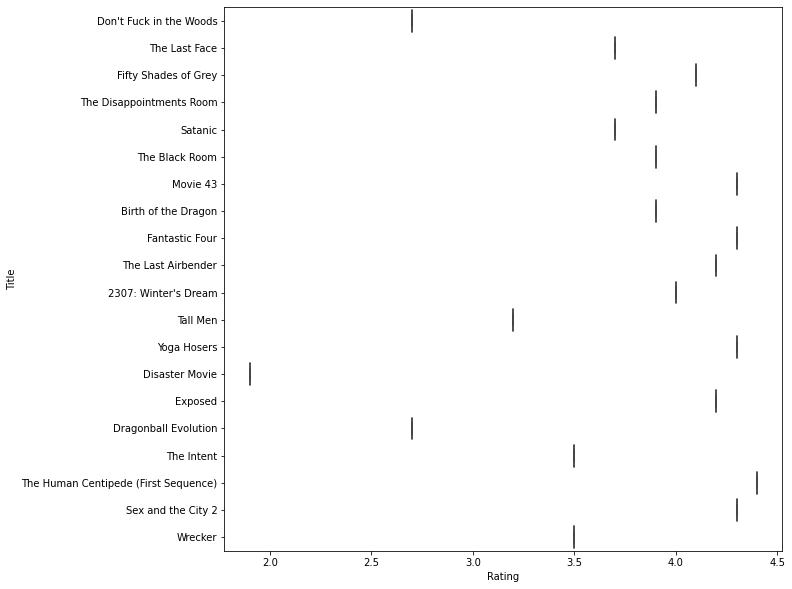

In [17]:
#create boxplot : for target variable : Rating with input variable Title

plt.figure(figsize=(10,10))
sb.boxplot(data=R,x="Rating",y="Title")
plt.show()

# figsize function is used to increase the size

In [18]:
df.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [19]:
# split dataframe df into 2 dataframes
# 1st dataframe -- holds all object type data
# 2nd dataframe -- hold all numerical type data
# so first create dataframe name df_cat which hold object type data

df_category=df.select_dtypes(object)
df_category.dtypes

Title          object
Genre          object
Description    object
Director       object
Actors         object
dtype: object

In [20]:
# then create dataframe name df_num which hold numeric type data

df_number=df.select_dtypes(["int64","float64"])
df_number.dtypes

Rank                    int64
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [21]:
df_category.head()

,Title,Genre,Description,Director,Actors
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D..."


In [22]:
df_number.head()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,2014,121,8.1,757074,333.13,76.0
1,2,2012,124,7.0,485820,126.46,65.0
2,3,2016,117,7.3,157606,138.12,62.0
3,4,2016,108,7.2,60545,270.32,59.0
4,5,2016,123,6.2,393727,325.02,40.0


In [23]:
df_category.shape

(1000, 5)

In [24]:
# now Convert all categorical type data(object type) into number type
#from sklearn.preprocessing import LabelEncoder
    
for col in df_category:
    # create object of LabelEncoder class
    le=LabelEncoder()
    df_category[col]=le.fit_transform(df_category[col])

In [25]:
df_category.head() # to check the category

,Title,Genre,Description,Director,Actors
0,287,11,110,265,184
1,568,85,538,518,736
2,655,195,880,391,418
3,635,92,613,105,658
4,673,7,220,136,971


In [26]:
df_category.dtypes

Title          int32
Genre          int32
Description    int32
Director       int32
Actors         int32
dtype: object

In [27]:
#To handle skewness on numeric column
#we have to see skewness on continuos numeric values
df_number.dtypes

Rank                    int64
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

Index(['Rank', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes',
       'Revenue (Millions)', 'Metascore'],
      dtype='object')
Column Name : Rank and skewness : 0.0


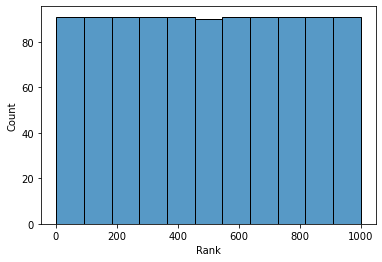

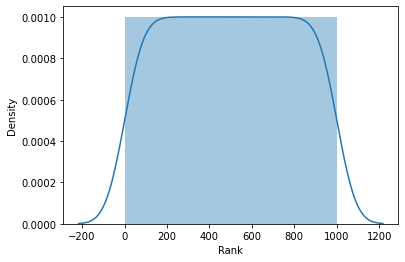

Column Name : Year and skewness : -0.6898787090642932


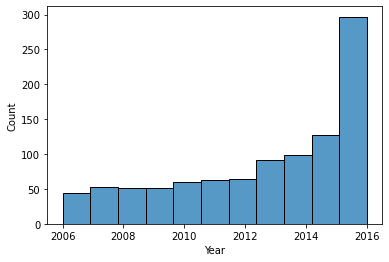

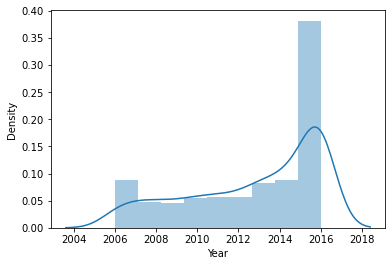

Column Name : Runtime (Minutes) and skewness : 0.8467127313911146


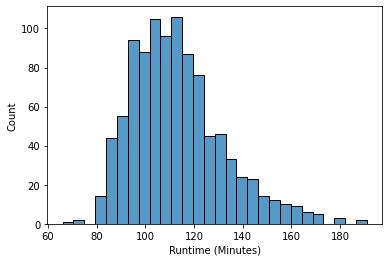

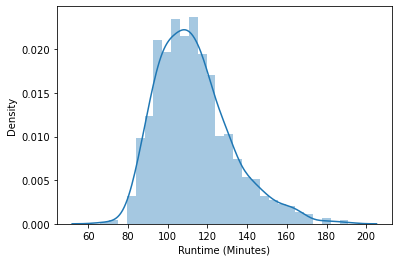

Column Name : Rating and skewness : -0.7431419408051025


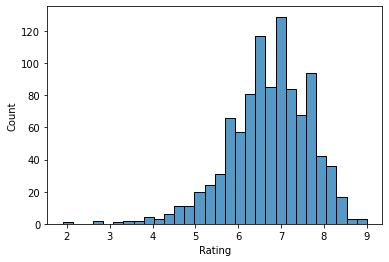

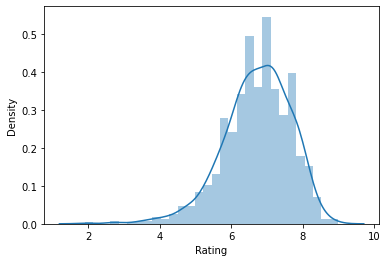

Column Name : Votes and skewness : 2.507918482788801


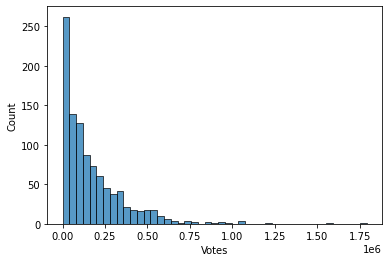

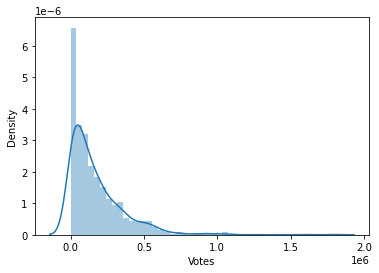

Column Name : Revenue (Millions) and skewness : 2.7756667049615684


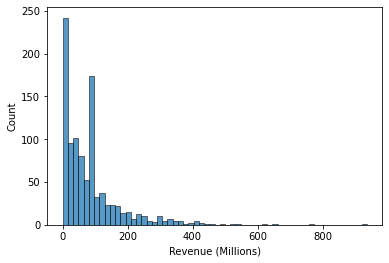

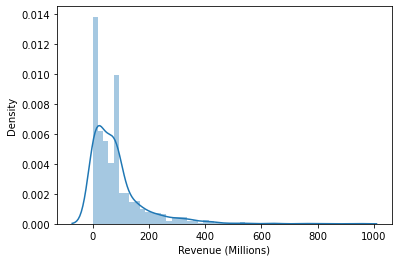

Column Name : Metascore and skewness : -0.12803962005923128


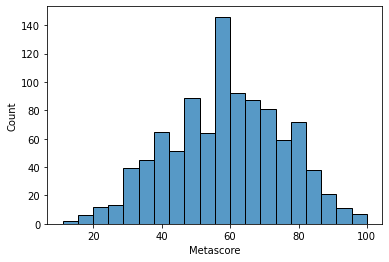

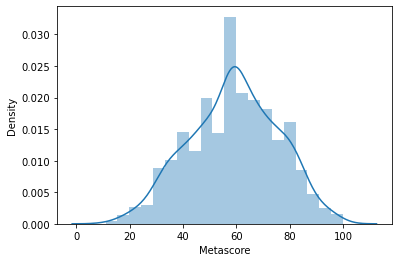

In [28]:
# Checking skewness

columns=df_number.columns
print(columns)
for col in columns:
    s=df_number[col].skew()
    print("Column Name : {} and skewness : {}".format(col,s))
    sb.histplot(df_number[col])
    plt.show()
    sb.distplot(df_number[col])
    plt.show()
    

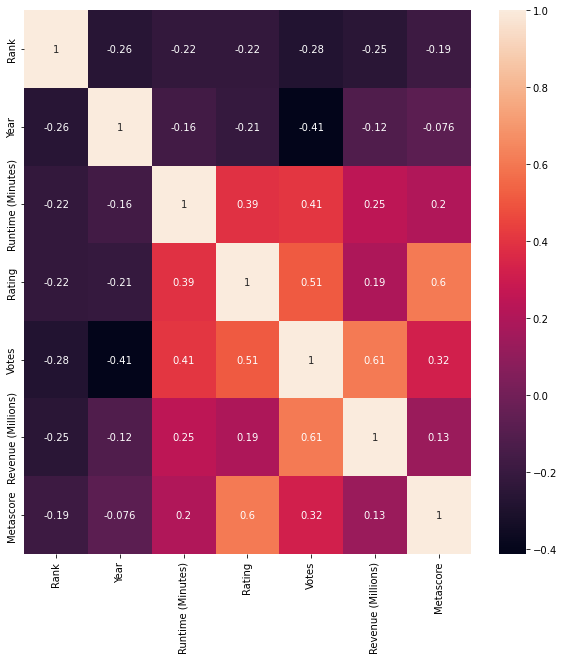

In [29]:
#check correlation between input and output
#here output is price and rest all are inputs
#we use corr() inbulit to find correlation between two variable 

plt.figure(figsize=(10,10)) #figure  is use to manage the size of the sheet with height and width parameter
sb.heatmap(df_number.corr(),annot=True)
plt.show()

In [30]:
#to minimize skewness of df['Year'] column

df['Year']=np.log(df['Year'])

In [31]:
# now check Year skewness

df['Year'].skew()

-0.6915584895130164

In [32]:
df['Revenue (Millions)']=np.log(df['Revenue (Millions)'])

In [33]:
# now check Revenue (Millions) skewness

df['Revenue (Millions)'].skew()

nan

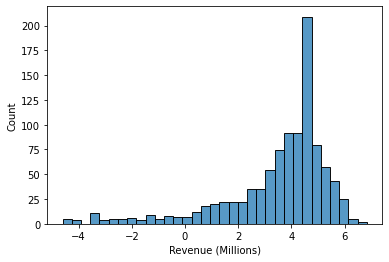

In [34]:
sb.histplot(df['Revenue (Millions)'])
plt.show()

In [35]:
# merge both  dataframe df_category and df_number and hold in new dataframe
# we use pandas concat because numpy remove all the labels(i.e heading) of the column
# for column  number of rows must be same
# concat() inbuilt methods of pandas,to join 2 or more dataframe column wise
# for column wise we use axis=1

df_new=pd.concat([df_category,df_number],axis=1)
df_new

,Title,Genre,Description,Director,Actors,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,287,11,110,265,184,1,2014,121,8.1,757074,333.130000,76.0
1,568,85,538,518,736,2,2012,124,7.0,485820,126.460000,65.0
2,655,195,880,391,418,3,2016,117,7.3,157606,138.120000,62.0
3,635,92,613,105,658,4,2016,108,7.2,60545,270.320000,59.0
4,673,7,220,136,971,5,2016,123,6.2,393727,325.020000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,612,144,273,69,160,996,2015,111,6.2,27585,82.956376,45.0
996,316,190,874,176,574,997,2007,94,5.5,73152,17.540000,46.0
997,668,170,742,324,794,998,2008,98,6.2,70699,58.010000,50.0
998,611,61,186,549,12,999,2014,93,5.6,4881,82.956376,22.0


In [36]:
#select input and output from given dataset
#We have to mention axis=1 for column otherwise it will consider axis=0 i.e rows

X=df_new.drop('Rating',axis=1)  #input
X.columns
#Y=df_new['Rating']  #output

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Rank', 'Year',
       'Runtime (Minutes)', 'Votes', 'Revenue (Millions)', 'Metascore'],
      dtype='object')

In [37]:
X=df_new.drop('Rating',axis=1)  #input

Y=df_new['Rating']  #output
Y # particular single column which is dropped

0      8.1
1      7.0
2      7.3
3      7.2
4      6.2
      ... 
995    6.2
996    5.5
997    6.2
998    5.6
999    5.3
Name: Rating, Length: 1000, dtype: float64

In [38]:
X

,Title,Genre,Description,Director,Actors,Rank,Year,Runtime (Minutes),Votes,Revenue (Millions),Metascore
0,287,11,110,265,184,1,2014,121,757074,333.130000,76.0
1,568,85,538,518,736,2,2012,124,485820,126.460000,65.0
2,655,195,880,391,418,3,2016,117,157606,138.120000,62.0
3,635,92,613,105,658,4,2016,108,60545,270.320000,59.0
4,673,7,220,136,971,5,2016,123,393727,325.020000,40.0
...,...,...,...,...,...,...,...,...,...,...,...
995,612,144,273,69,160,996,2015,111,27585,82.956376,45.0
996,316,190,874,176,574,997,2007,94,73152,17.540000,46.0
997,668,170,742,324,794,998,2008,98,70699,58.010000,50.0
998,611,61,186,549,12,999,2014,93,4881,82.956376,22.0


In [39]:
#Apply standard scaler on Input column X

from sklearn.preprocessing import StandardScaler

#create object of standardscaler class

ss=StandardScaler()
X=ss.fit_transform(X)#convert into numpy 2d array
X


array([[-7.36132133e-01, -1.45927783e+00, -1.34926825e+00, ...,
         3.11268996e+00,  2.59613630e+00,  1.02336136e+00],
       [ 2.38229746e-01, -2.58279549e-01,  1.33367979e-01, ...,
         1.67495992e+00,  4.51451817e-01,  3.61768457e-01],
       [ 5.39900505e-01,  1.52698816e+00,  1.31809132e+00, ...,
        -6.46757230e-02,  5.72451581e-01,  1.81334029e-01],
       ...,
       [ 5.84977745e-01,  1.12124550e+00,  8.40045062e-01, ...,
        -5.25309685e-01, -2.58876982e-01, -5.40403681e-01],
       [ 3.87331385e-01, -6.47792505e-01, -1.08599640e+00, ...,
        -8.74165428e-01, -1.47470845e-16, -2.22445834e+00],
       [ 1.63110259e-02,  3.25989884e-01, -8.67757888e-01, ...,
        -8.34126893e-01, -6.57055448e-01, -2.88605124e+00]])

In [40]:
#2nd method for standard scaler in dataset

X=df_new.drop('Rating',axis=1)
columns=X.columns
for col in columns:
    df_new[col]=ss.fit_transform(df_new[[col]])

In [41]:
df_new.head()

,Title,Genre,Description,Director,Actors,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,-0.736132,-1.459278,-1.349268,-0.335620,-1.090743,-1.730320,0.379795,0.416350,8.1,3.112690,2.596136,1.023361
1,0.238230,-0.258280,0.133368,1.027352,0.830272,-1.726856,-0.244355,0.575911,7.0,1.674960,0.451452,0.361768
2,0.539901,1.526988,1.318091,0.343173,-0.276400,-1.723391,1.003945,0.203601,7.3,-0.064676,0.572452,0.181334
3,0.470551,-0.144672,0.393176,-1.197578,0.558824,-1.719927,1.003945,-0.275084,7.2,-0.579129,1.944336,0.000900
4,0.602315,-1.524197,-0.968217,-1.030574,1.648095,-1.716463,1.003945,0.522724,6.2,1.186839,2.511976,-1.141852


In [42]:
df_new.values

array([[-7.36132133e-01, -1.45927783e+00, -1.34926825e+00, ...,
         3.11268996e+00,  2.59613630e+00,  1.02336136e+00],
       [ 2.38229746e-01, -2.58279549e-01,  1.33367979e-01, ...,
         1.67495992e+00,  4.51451817e-01,  3.61768457e-01],
       [ 5.39900505e-01,  1.52698816e+00,  1.31809132e+00, ...,
        -6.46757230e-02,  5.72451581e-01,  1.81334029e-01],
       ...,
       [ 5.84977745e-01,  1.12124550e+00,  8.40045062e-01, ...,
        -5.25309685e-01, -2.58876982e-01, -5.40403681e-01],
       [ 3.87331385e-01, -6.47792505e-01, -1.08599640e+00, ...,
        -8.74165428e-01, -1.47470845e-16, -2.22445834e+00],
       [ 1.63110259e-02,  3.25989884e-01, -8.67757888e-01, ...,
        -8.34126893e-01, -6.57055448e-01, -2.88605124e+00]])

In [43]:
#    *****END*****